# 時系列データ分析1

In [1]:
import pandas as pd

df = pd.read_csv('online_retail_II_uk_2010.csv', parse_dates=['InvoiceDate'], index_col=['InvoiceDate'])
df['Subtotal'] = df['Quantity'] * df['Price']
df = df[df['Invoice'].str.startswith('C') == False]
df = df.dropna()
df['Month'] = df.index.month
df = df.set_index(['Month'])
df

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
Month,,,,,,
1,493410,TEST001,5,4.50,12346.0,22.50
1,493412,TEST001,5,4.50,12346.0,22.50
1,493414,21844,36,2.55,14590.0,91.80
1,493414,21533,12,4.25,14590.0,51.00
1,493414,37508,2,2.55,14590.0,5.10
...,...,...,...,...,...,...
12,539988,84380,1,1.25,18116.0,1.25
12,539988,84849D,1,1.69,18116.0,1.69
12,539988,84849B,1,1.69,18116.0,1.69


In [2]:
df_month_subtotal = df[['Subtotal']].groupby(['Month']).sum()
df_month_subtotal

,Subtotal
Month,
1,415120.502
2,409265.826
3,587165.941
4,500727.401
5,501360.660
6,538672.610
7,502317.300
8,506470.040
9,679069.921


In [3]:
from sklearn import linear_model

x = df_month_subtotal.index.values
x = x.reshape(-1, 1)
y = df_month_subtotal['Subtotal'].values
y = y.reshape(-1, 1)

# 線形回帰
model = linear_model.LinearRegression()
model.fit(x, y)

print('係数: %s' % model.coef_)
print('切片: %s' % model.intercept_)

係数: [[31127.32585664]]
切片: [380187.52634848]


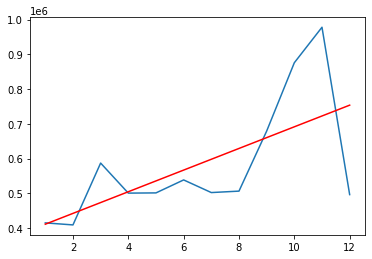

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.plot(x, y)

x_for_pred = np.linspace(1, 12).reshape(-1, 1)
pred = model.predict(x_for_pred)

plt.plot(x_for_pred, pred, color='red')
plt.show()

## 課題（1-1）

In [5]:
by_item = df[['StockCode', 'Subtotal']].groupby(['StockCode']).sum().sort_values(['Subtotal'], ascending=False)
by_item

,Subtotal
StockCode,
22423,130965.750
85123A,127327.550
85099B,71486.250
84879,59528.750
M,52086.840
...,...
84205C,0.380
72708,0.210
84206C,0.190


In [6]:
df_1 = df[df['StockCode'] == by_item.index[0]]
df_1

,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
Month,,,,,,
3,501276,22423,8,12.75,18135.0,102.00
3,501320,22423,8,12.75,15123.0,102.00
3,501345,22423,8,12.75,15946.0,102.00
3,501422,22423,1,12.75,14146.0,12.75
3,501434,22423,1,12.75,14496.0,12.75
...,...,...,...,...,...,...
12,539647,22423,1,12.75,15460.0,12.75
12,539653,22423,4,12.75,13564.0,51.00
12,539653,22423,2,12.75,13564.0,25.50


In [7]:
df_1_month_subtotal = df_1[['Subtotal']].groupby(['Month']).sum()
df_1_month_subtotal

,Subtotal
Month,
3,6565.05
4,11523.60
5,4180.65
6,13310.40
7,15380.25
8,9419.25
9,18441.15
10,18394.95
11,17934.15


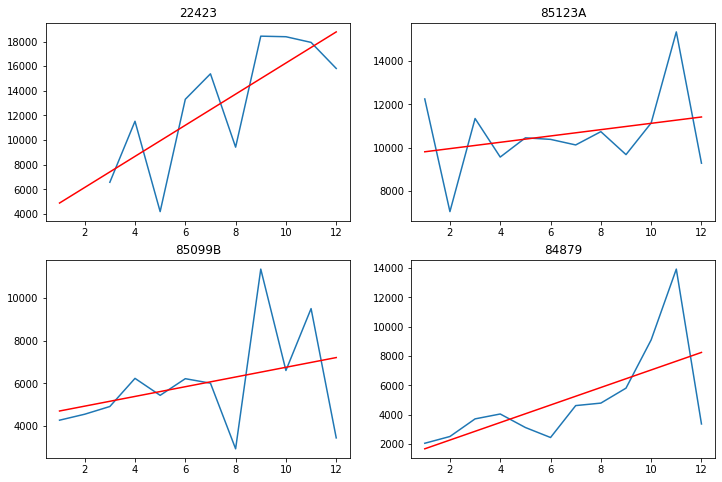

In [8]:
fig = plt.figure(figsize=(12, 8))

for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)

    df_item = df[df['StockCode'] == by_item.index[i]]
    df_item_month_subtotal = df_item[['Subtotal']].groupby(['Month']).sum()

    x = df_item_month_subtotal.index.values
    x = x.reshape(-1, 1)
    y = df_item_month_subtotal['Subtotal'].values
    y = y.reshape(-1, 1)

    # 線形回帰
    model = linear_model.LinearRegression()
    model.fit(x, y)

    ax.plot(x, y)
    ax.set_title(by_item.index[i])
    x_for_pred = np.linspace(1, 12).reshape(-1, 1)
    pred = model.predict(x_for_pred)
    ax.plot(x_for_pred, pred, color='red')

## 課題（1-2）

In [9]:
import pandas as pd

df = pd.read_csv('online_retail_II_uk_all.csv', parse_dates=['InvoiceDate'], index_col=['InvoiceDate'])
df['Subtotal'] = df['Quantity'] * df['Price']
df = df[df['Invoice'].str.startswith('C') == False]
df = df.dropna()
df['Year'] = df.index.year
df['Month'] = df.index.month
df = df.set_index(['Year', 'Month'])
df_ym_subtotal = df[['Subtotal']].groupby(['Year', 'Month']).sum()
df_ym_subtotal

Subtotal
Year Month            
2009 12     610346.630
2010 1      415120.502
     2      409265.826
     3      587165.941
     4      500727.401
     5      501360.660
     6      538672.610
     7      502317.300
     8      506470.040
     9      679069.921
     10     875712.980
     11     977832.812
     12     496465.740
2011 1      440837.330
     2      354618.200
     3      465764.390
     4      408733.111
     5      550274.950
     6      523775.590
     7      483629.591
     8      497194.910
     9      794608.292
     10     821135.390
     11     975195.390
     12     471361.920

In [18]:
from sklearn import linear_model
import numpy as np

x = np.arange(1, 26)
x = x.reshape(-1, 1)
y = df_ym_subtotal['Subtotal'].values
y = y.reshape(-1, 1)

# 線形回帰
model = linear_model.LinearRegression()
model.fit(x, y)

print('係数: %s' % model.coef_)
print('切片: %s' % model.intercept_)

係数: [[6051.27955]]
切片: [496839.66293]


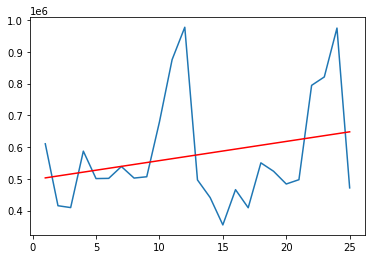

In [20]:
plt.plot(x, y)

x_for_pred = np.linspace(1, 25).reshape(-1, 1)
pred = model.predict(x_for_pred)

plt.plot(x_for_pred, pred, color='red')
plt.show()

# 時系列データ分析2

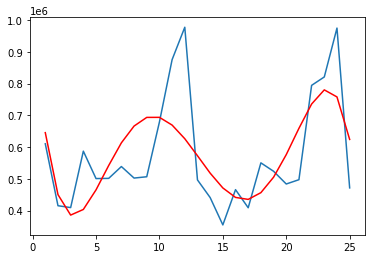

In [44]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(1, len(df_ym_subtotal.index.values) + 1)
X = x.reshape(-1, 1)
y = df_ym_subtotal['Subtotal'].values
y = y.reshape(-1, 1)

x_pf = PolynomialFeatures(degree=5)
X_transform = x_pf.fit_transform(X)

model = linear_model.LinearRegression()
model.fit(X_transform, y)

pred = model.predict(X_transform)
plt.plot(x, y)
plt.plot(x, pred, color='red')

## 課題2

In [29]:
import pandas as pd

df = pd.read_csv('online_retail_II_uk_all.csv', parse_dates=['InvoiceDate'], index_col=['InvoiceDate'])
df['Subtotal'] = df['Quantity'] * df['Price']
df = df[df['Invoice'].str.startswith('C') == False]
df = df.dropna()
df['Year'] = df.index.year
df['Month'] = df.index.month
df = df.set_index(['Year', 'Month'])

In [30]:
by_item = df[['StockCode', 'Subtotal']].groupby(['StockCode']).sum().sort_values(['Subtotal'], ascending=False)
by_item

,Subtotal
StockCode,
85123A,227965.510
22423,225862.450
23843,168469.600
85099B,151512.580
84879,115444.330
...,...
TEST002,1.000
20721,0.850
84205C,0.380


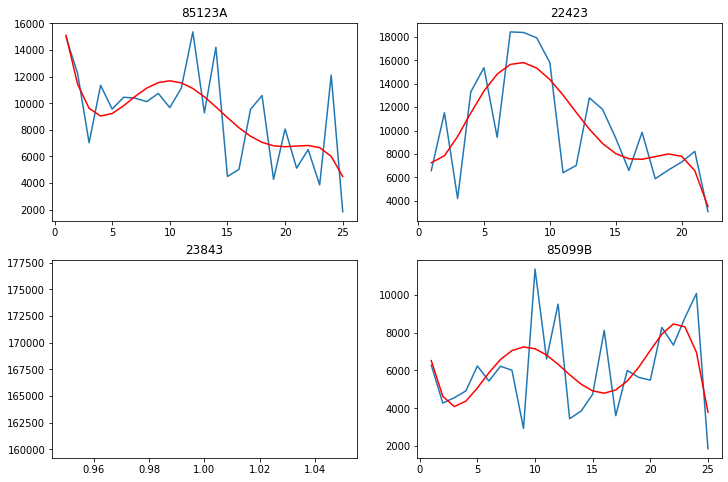

In [48]:
fig = plt.figure(figsize=(12, 8))

for i in range(0, 4):
    ax = fig.add_subplot(2, 2, i+1)

    df_item = df[df['StockCode'] == by_item.index[i]]
    df_item_month_subtotal = df_item[['Subtotal']].groupby(['Year', 'Month']).sum()

    x = np.arange(1, len(df_item_month_subtotal.index) + 1)
    X = x.reshape(-1, 1)
    y = df_item_month_subtotal['Subtotal'].values
    y = y.reshape(-1, 1)

    x_pf = PolynomialFeatures(degree=5)
    X_transform = x_pf.fit_transform(X)

    model = linear_model.LinearRegression()
    model.fit(X_transform, y)

    pred = model.predict(X_transform)
    ax.plot(x, y)
    ax.set_title(by_item.index[i])
    ax.plot(x, pred, color='red')

In [47]:
df[df['StockCode'] == '23843']

,,Invoice,StockCode,Quantity,Price,Customer ID,Subtotal
Year,Month,,,,,,
2011,12,581483,23843,80995,2.08,16446.0,168469.6
